# Ford Go Bike System-  Communicating data findings 
## by Muhammed Shittu




## Investigation Overview


> Most of the bike users fall between the ages of 20- 40 years. In addition, subscribers use the system heavily on work days (Monday -Friday) whereas customers also ride more on weekends, and frequently in the afternoon. Many trips concentrated around 8-9 am and 4-6 pm on work days for subscribers, yet customers tend to use more in the late afternoon around 5 pm Monday to Friday. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for the work commute for subscribers.


## Dataset Overview

> This dataset includes information on each ride taken in a bike-sharing program that serves the greater San Francisco Bay area

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('ford_gobike_clean.csv')
df_clean.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_day,hour,start_month,end_month,end_day,duration_min,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,35,Thu,17,February,March,Fri,869,0.544709
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,47,Thu,12,February,March,Fri,1030,2.704545
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,30,Thu,17,February,March,Fri,608,0.260739
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,45,Thu,23,February,March,Fri,26,2.409301
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,60,Thu,23,February,March,Fri,29,3.332203


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Age of Biker users
> Not surprisingly, most of the biker users falls between ages of 20 years to 40 years, and the highest users overall fall between the ages of 30 - 40 years of age. this shows that most of the bike users are of working class age.


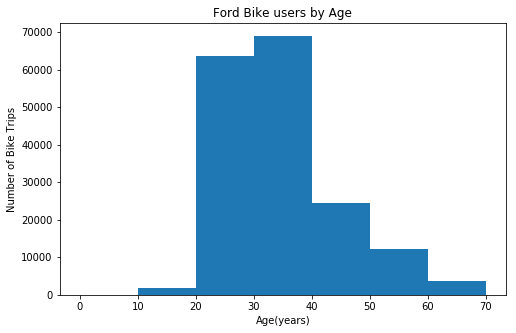

In [37]:
# Age of the bike users
binsize = 10
bins = np.arange(0, df_clean['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_age', bins = bins)
plt.xlabel('Age(years)')
plt.ylabel('Number of Bike Trips');
plt.title('Ford Bike users by Age')
plt.show()

## Highlighting the proportion of the user types

> The chart showed that most of the bike riders are subscribers(91%), and only few of the bike riders are customers. Further insight will be generated consquently to understand why there are more subscribers than customers 

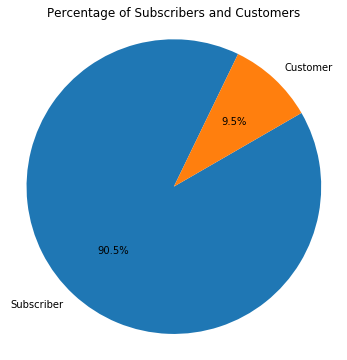

In [4]:
#Perentage of Customers and Subscribers
fig, ax = plt.subplots(figsize=(6, 6))
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 30, counterclock = False,autopct='%.1f%%');
plt.axis('square');
plt.title('Percentage of Subscribers and Customers');


## Relationship between bike usage during the days of the week for different user types

> The chart shows that most the bike users are subscribers, and most users drive their bike during the weekdays, and they msotly drive less during the weekends. The chart also showed that subscribers mostly ride their bike less during the weekends, on the other hand customers drive at almost the same during the weekdays and weekends. It can be deduced that most of the subscribers used their bike to commute to work mostly.

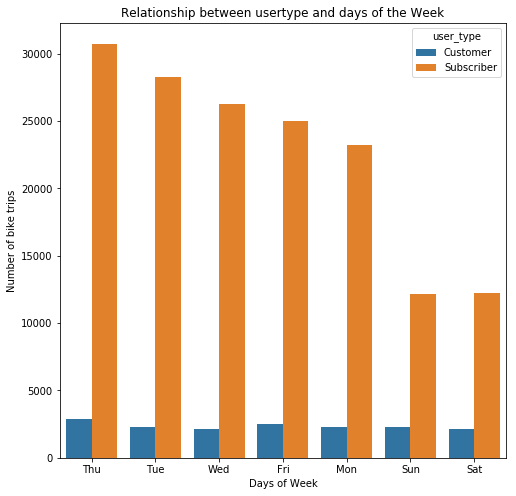

In [14]:
# Relationship between user type and days of the week
plt.figure(figsize = [8, 8])
type_order = df_clean['start_day'].value_counts().index
sb.countplot(data=df_clean, x='start_day', hue='user_type', order=type_order);
plt.xlabel('Days of Week');
plt.ylabel('Number of bike trips');
plt.title('Relationship between usertype and days of the Week');


## User types (Subscriber and Customer) bike usage time and days of the week

> It can be deduced from the chart that most trips were taking between 8am - 9am in the morning, and during the evening time of 5pm - 6pm. It can also be ascertain from the chart that the subscribers mostly ride bikes mostly during the weekdays (Monday - Friday) and frequently drive during the weekends. it can be said that most of the subscribers msotly ride their backs to their workplaces. On the other hand, the customers drive their bikes on both weekdays and weekends, on weekdays, the customer peak of driving is mostly around 8am and late in the evening around 5-6pm. During the weekends, the customers mostly drive their bikes from 10am - 4pm. there is some variations between the usage of bike by the subscribers and customers most especially during the weekends.

Text(0.5,0.98,'Hourly Usage during Weekdays for Customers and Subscribers')

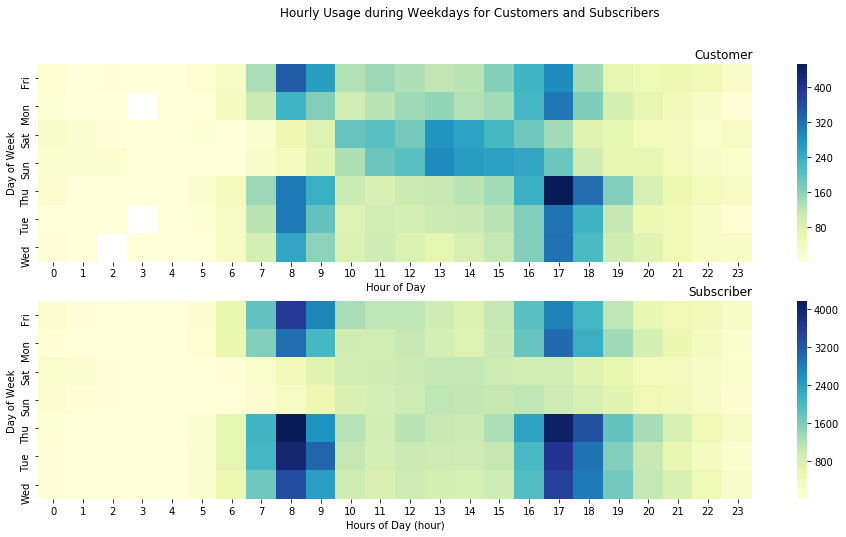

In [38]:


plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='hour', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='hour', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hours of Day (hour)');
plt.ylabel('Day of Week');
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
